In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2)Loading the dataset
To import the dataset we will use Pandas library.It is the best Python library to play with the dataset and has a lot of functionalities.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


df.columns.tolist() fetches all the columns and then convert it into list type.This step is just to check out all the column names in our data.Columns are also called as features of our datasets.

In [ ]:
df.shape

(3000, 9)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


df.head() displays first five rows of our datasets.

In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


**df.corr()** compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.Positive values shows as one variable increases other variable increases as well. Negative values shows as one variable increases other variable decreases.Bigger the values,more strongly two varibles are correlated and viceversa.


**Visualising correlation using Seaborn library**

Text(0.5, 1.0, 'Correlation between different fearures')

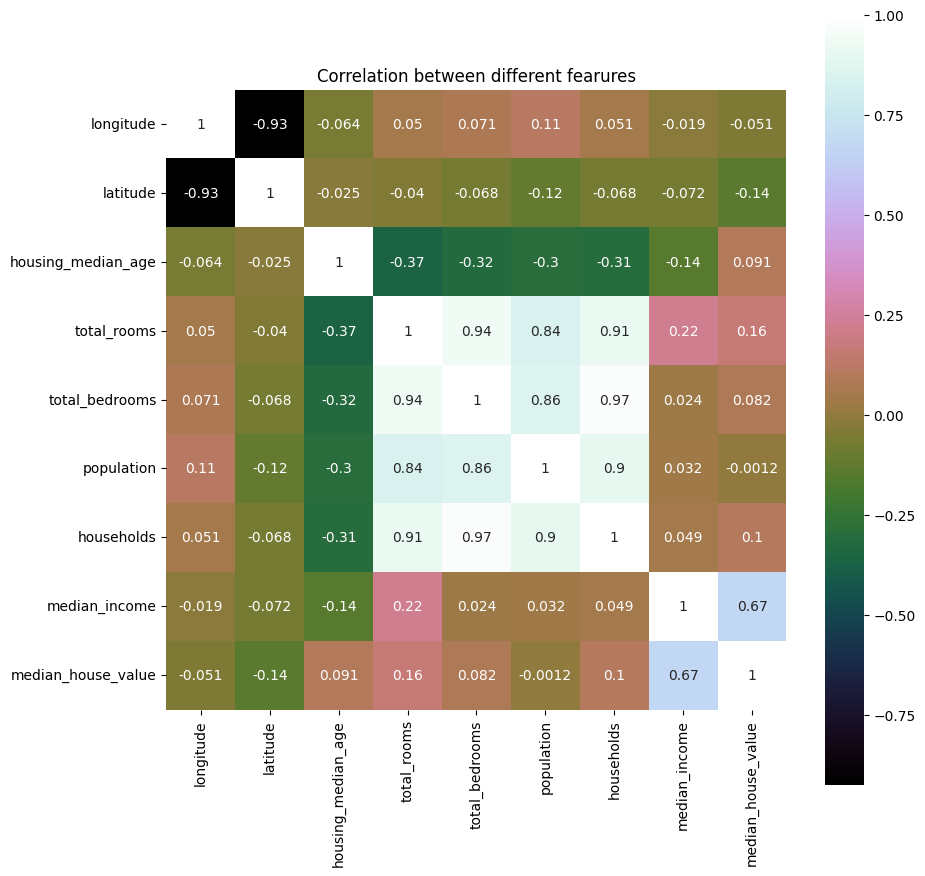

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

**Doing some visualisation before moving onto PCA**

In [ ]:
df['total_bedrooms'].unique()

array([ 661.,  310.,  507., ...,  779., 1037.,  743.])

Here we are printing all the unique values in **dept** columns

In [ ]:
dept=df.groupby('total_bedrooms').sum()
dept

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
total_bedrooms,,,,,,,,
2.0,-116.95,33.86,1.0,6.0,8.0,2.0,1.6250,55000.0
3.0,-114.62,33.62,26.0,18.0,5.0,3.0,0.5360,275000.0
4.0,-117.12,32.66,52.0,16.0,8.0,3.0,1.1250,60000.0
5.0,-117.11,32.66,52.0,25.0,14.0,9.0,1.6250,118800.0
7.0,-236.50,68.07,85.0,53.0,35.0,16.0,4.5625,400000.0
...,...,...,...,...,...,...,...,...
4522.0,-116.36,33.78,6.0,24121.0,4176.0,2221.0,3.3799,239300.0
4585.0,-117.22,32.86,4.0,16289.0,7604.0,4176.0,3.6287,280800.0
5027.0,-121.53,38.48,5.0,27870.0,11935.0,4855.0,4.8811,212200.0


In [ ]:
df['total_bedrooms'].unique()

array([ 661.,  310.,  507., ...,  779., 1037.,  743.])

In [ ]:
groupby_dept=df.groupby('total_bedrooms').mean()
groupby_dept

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
total_bedrooms,,,,,,,,
2.0,-116.95,33.860,1.0,6.0,8.0,2.0,1.62500,55000.0
3.0,-114.62,33.620,26.0,18.0,5.0,3.0,0.53600,275000.0
4.0,-117.12,32.660,52.0,16.0,8.0,3.0,1.12500,60000.0
5.0,-117.11,32.660,52.0,25.0,14.0,9.0,1.62500,118800.0
7.0,-118.25,34.035,42.5,26.5,17.5,8.0,2.28125,200000.0
...,...,...,...,...,...,...,...,...
4522.0,-116.36,33.780,6.0,24121.0,4176.0,2221.0,3.37990,239300.0
4585.0,-117.22,32.860,4.0,16289.0,7604.0,4176.0,3.62870,280800.0
5027.0,-121.53,38.480,5.0,27870.0,11935.0,4855.0,4.88110,212200.0


Text(0.5, 1.0, 'Mean Satisfaction Level of each department')

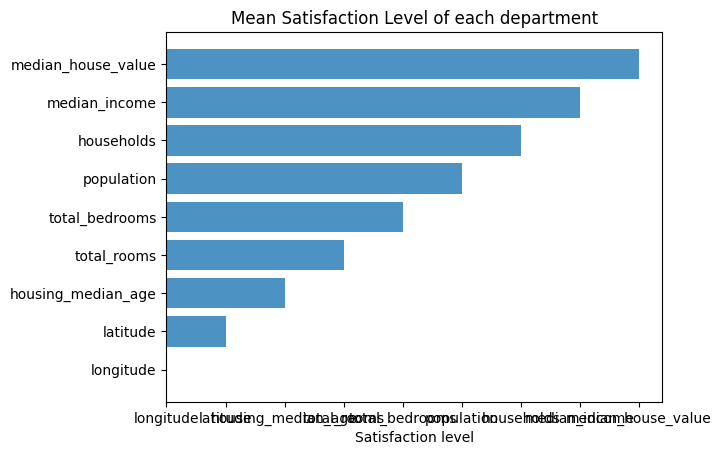

In [ ]:

department_name=('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value')
department=('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value')
y_pos = np.arange(len(department))
x=np.arange(0,1,0.1)

plt.barh(y_pos, department, align='center', alpha=0.8)
plt.yticks(y_pos,department_name )
plt.xlabel('Satisfaction level')
plt.title('Mean Satisfaction Level of each department')

# Principal Component Analysis

In [ ]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df_drop=df.drop(labels=['Age','Salary'],axis=1)
df_drop.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


**df.drop()**  is the method to drop the columns in our dataframe

Now we need to bring "left" column to the front as it is the label and not the feature.

In [ ]:
cols = df_drop.columns.tolist()
cols

['Purchased']

Here we are converting columns of the dataframe to list so it would be easier for us to reshuffle the columns.We are going to use cols.insert method


In [ ]:
cols.insert(0, cols.pop(cols.index('Purchased')))

In [ ]:
cols

['Purchased']

In [ ]:
df_drop = df_drop.reindex(columns= cols)

By using df_drop.reindex(columns= cols) we are converting list to columns again

Now we are separating features of our dataframe from the labels.

In [ ]:
X = df_drop.iloc[2:,1:8].values
y = df_drop.iloc[:,0].values
X

array([], shape=(398, 0), dtype=float64)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
np.shape(X)

(400, 0)

Thus X is now matrix with 14999 rows and 7 columns

In [ ]:
np.shape(y)

(400,)

y is now matrix with 14999 rows and 1 column

# 4) Data Standardisation
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model.
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = x


# 5) Computing Eigenvectors and Eigenvalues:
Before computing Eigen vectors and values we need to calculate covariance matrix.

## Covariance matrix

In [ ]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
0.09166666666666669


In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
0.09166666666666669


Equivalently we could have used Numpy np.cov to calculate covariance matrix

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

ValueError: ignored

<Figure size 800x800 with 0 Axes>

# Eigen decomposition of the covariance matrix

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


LinAlgError: ignored

In [ ]:
# 6) Selecting Principal Components¶

# 6) Selecting Principal Components

T
In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

**Explained Variance**
After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), var_exp, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that maximum variance (somewhere around 26%) can be explained by the first principal component alone. The second,third,fourth and fifth principal component share almost equal amount of information.Comparatively 6th and 7th components share less amount of information as compared to the rest of the Principal components.But those information cannot be ignored since they both contribute almost 17% of the data.But we can drop the last component as it has less than 10% of the variance

**Projection Matrix**

The construction of the projection matrix that will be used to transform the Human resouces analytics data onto the new feature subspace. **Suppose only 1st and 2nd principal component shares the maximum amount of information say around 90%**.Hence we can drop other components. Here, we are reducing the 7-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W


In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1),
                      eig_pairs[1][1].reshape(7,1)
                    ))
print('Matrix W:\n', matrix_w)

**Projection Onto the New Feature Space**
In this last step we will use the 7×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
**Y=X×W**

In [ ]:
Y = X_std.dot(matrix_w)
Y

# PCA in scikit-learn

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The above plot shows almost 90% variance by the first 6 components. Therfore we can drop 7th component.

In [ ]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [ ]:
print(Y_sklearn)

In [ ]:
Y_sklearn.shape

Thus Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.